# Oil Well Location Analysis: Predicting Profitable Regions for New Wells

The goal of this project is to identify the most profitable region for establishing a new oil well for the OilyGiant mining company. 

**Objectives:** 
1. **Explore and preprocess the data**: Understand the structure and quality of the data.
2. **Develop a predictive model**: Estimate the volume of reserves for potential wells.
3. **Select the most profitable wells**: Focus on wells with the highest potential returns.
4. **Estimate profit and risks**: Use statistical techniques to evaluate investment feasibility.

By analyzing geological data from three regions, we will apply predictive modeling and statistical analysis to guide data-driven decisions. This analysis will assist OilyGiant in minimizing financial risks and maximizing potential returns on investment. 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats


## Load and Inspect the Data

**Data Description:**

| Column     | Description                                                                 |
|------------|-----------------------------------------------------------------------------|
| `id`       | Unique oil well identifier.                                                |
| `f0, f1, f2` | Features of the geological data points (specific meaning is not important, but they are significant for predictions). |
| `product`  | Volume of reserves in the oil well (in thousand barrels).                  |

In [2]:
# Load the data
# Define file paths
local_files = ['./datasets/geo_data_0.csv', './datasets/geo_data_1.csv', './datasets/geo_data_2.csv']
server_files = [
    'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv',
    'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_1.csv',
    'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_2.csv'
]

# Load each file individually
data = []
for i in range(3):
    try:
        df = pd.read_csv(local_files[i])
        print(f"Loaded {local_files[i]} from local computer.")
    except FileNotFoundError:
        try:
            df = pd.read_csv(server_files[i])
            print(f"Loaded {server_files[i]} from server.")
        except Exception as e:
            print(f"Error loading {server_files[i]}: {e}")
            df = None  # Set to None to handle missing data gracefully
    data.append(df)

# Assign to variables
data_0, data_1, data_2 = data
    

Loaded ./datasets/geo_data_0.csv from local computer.
Loaded ./datasets/geo_data_1.csv from local computer.
Loaded ./datasets/geo_data_2.csv from local computer.


In [3]:
# Inspect the data for region 0
display(data_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
# Inspect the data for region 1
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [9]:
# Inspect the data for region 2
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [11]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


# Data Preprocessing

In this section, we will clean and preprocess the data to ensure it is ready for analysis and modeling. Key tasks include:

1. **Handling missing values**: Identify and address any gaps in the data.
2. **Feature scaling and transformation**: Standardize numerical features if necessary.
3. **Outlier detection**: Check for and handle extreme values that could skew the analysis.
4. **Data split**: Divide the data into training and testing sets for model evaluation.

These steps will help improve the quality and reliability of the subsequent analysis.

In [12]:
# Checking for missing values - region 0
data_0.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
# Check for duplicates - region 0
data_0.duplicated().sum()

0

In [14]:
# Checking for missing values - region 1
data_1.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [15]:
# Check for duplicates - region 1
data_1.duplicated().sum()

0

In [16]:
# Checking for missing values - region 2
data_2.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [17]:
data_2.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In this section, we will explore the data to identify trends, patterns, and differences across the three regions. Key objectives include:

1. **Compare reserve distributions**:
   - Visualize the distribution of oil reserves (`product`) in each region.
   - Identify potential outliers and evaluate the spread of reserves.
2. **Analyze feature relationships**:
   - Examine correlations between features (`f0`, `f1`, `f2`) and the target variable (`product`).
   - Look for any region-specific trends that could affect predictions.
3. **Summary statistics**:
   - Calculate key metrics (mean, median, standard deviation) for reserves and features in each region.

These insights will guide the modeling process and help us focus on the most critical patterns.

## Reviewing the 'Product' Statistics

In [18]:
# Total reserves for each region
tot_reserves_region_0 = data_0['product'].sum() 
tot_reserves_region_1 = data_1['product'].sum() 
tot_reserves_region_2 = data_2['product'].sum()

tot_reserves_region_0, tot_reserves_region_1, tot_reserves_region_2

(9250000.000000002, 6882500.000000002, 9500000.000000004)

/Users/lrw/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


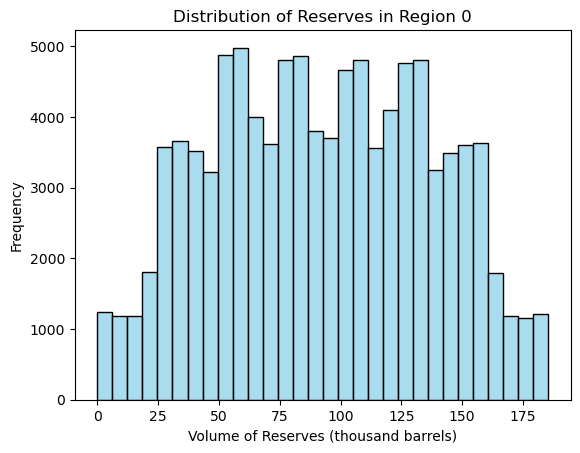

In [19]:
# Create a histogram for region 0
sns.histplot(data=data_0['product'], 
             bins=30,
             color='skyblue', 
             edgecolor='black',
             alpha=0.7).set(title="Distribution of Reserves in Region 0")
plt.xlabel('Volume of Reserves (thousand barrels)')
plt.ylabel('Frequency')

plt.show()

/Users/lrw/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


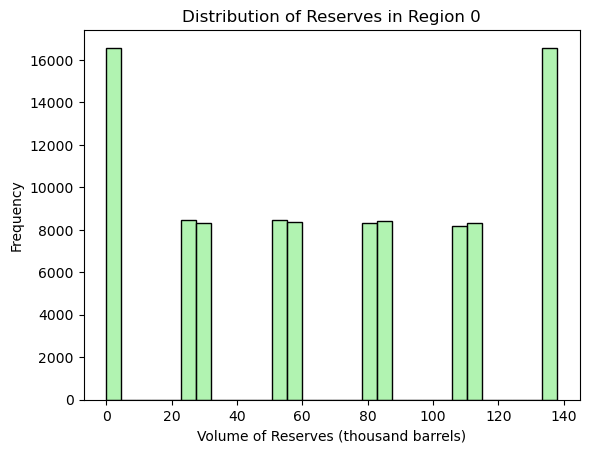

/Users/lrw/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


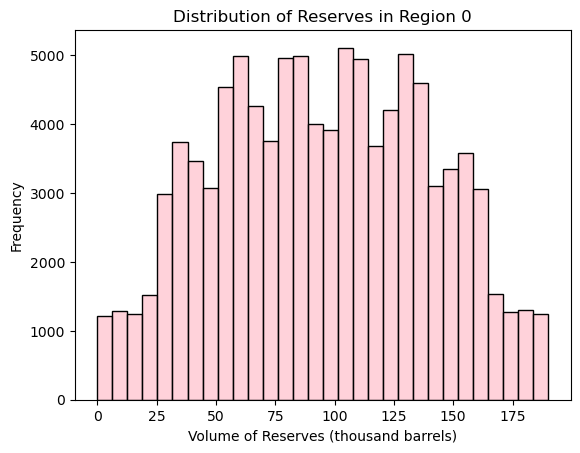

In [20]:
# Region 1
sns.histplot(data=data_1['product'], 
             bins=30,
             color='lightgreen', 
             edgecolor='black',
             alpha=0.7).set(title="Distribution of Reserves in Region 0")
plt.xlabel('Volume of Reserves (thousand barrels)')
plt.ylabel('Frequency')

plt.show()

# Region 2
sns.histplot(data=data_2['product'], 
             bins=30,
             color='pink', 
             edgecolor='black',
             alpha=0.7).set(title="Distribution of Reserves in Region 0")
plt.xlabel('Volume of Reserves (thousand barrels)')
plt.ylabel('Frequency')

plt.show()

### Analyzing the Plots

**Region 0: Normal Distribution**

- What it suggests:

    - A normal distribution often implies consistency in the reserves across the wells in this region.
    - There might be fewer extreme highs or lows, making it easier to predict reserves using a linear regression model.

- Impact on Model:
    - A normal distribution is favorable for modeling since it's easier to predict and validate.
    - This region might be stable and profitable, depending on other metrics.

**Region 1: Fewer Bins and Outliers**

- What it suggests:

    - The fewer bins could indicate that most reserve values are concentrated around a specific range, creating a narrower distribution.
    - The outliers (high reserve values) could significantly affect the average and may require special handling.

- Impact on Model:

    - The presence of outliers may skew predictions if not addressed. For instance:
    - Removing extreme outliers or applying log transformation might help.
    - The narrow range for most reserves suggests that many wells may have similar yields, but the outliers could provide high rewards or risks.
    - The region might require additional risk analysis, especially since profit depends heavily on high-performing wells.

**Region 2: Normal Distribution**

- What it suggests:
    - Like Region 0, this region seems to have a relatively even spread of reserve volumes.
    - The absence of significant outliers suggests less risk of skewed profit margins.

- Impact on Model:
    - Predicting reserves in Region 2 might be as straightforward as in Region 0.
    - If other criteria (like average reserve size or profit margin) are favorable, this region might also be a good candidate.


### Numerical summary of 'product' statistics

In [21]:
# Checking to see what the distribution shows and if we need to standardize the features
print("Region 0 Summary:")
print(data_0['product'].describe())

print("\nRegion 1 Summary:")
print(data_1['product'].describe())

print("\nRegion 2 Summary:")
print(data_2['product'].describe())

Region 0 Summary:
count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

Region 1 Summary:
count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

Region 2 Summary:
count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64


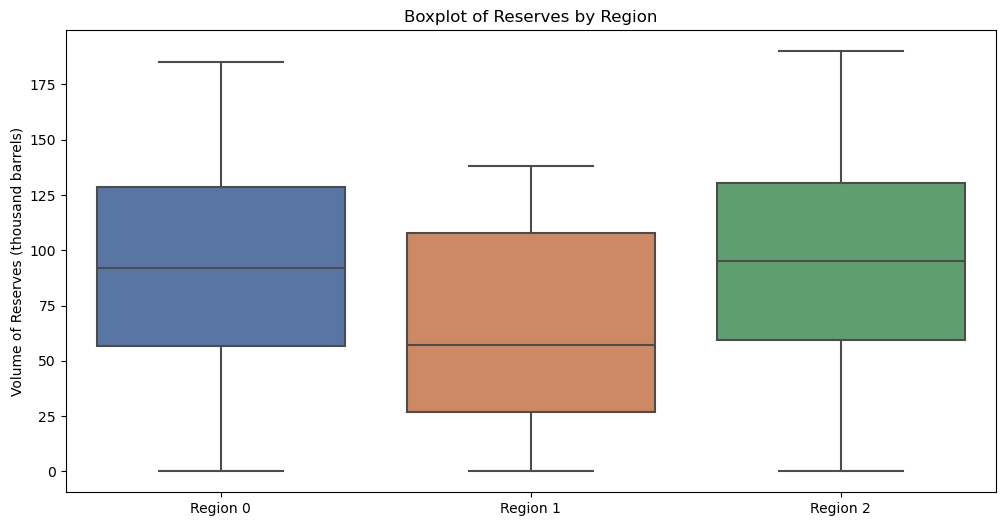

In [62]:
# Create a boxplot of the oil from each region
visuals = [data_0['product'], data_1['product'], data_2['product']]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=visuals, palette="deep")
plt.xticks([0, 1, 2], ['Region 0', 'Region 1', 'Region 2'])
plt.title('Boxplot of Reserves by Region')
plt.ylabel('Volume of Reserves (thousand barrels)')

plt.show()


### Observations from the Boxplot

Region 0: Higher Reserves

- The median reserve is higher than in the other two regions.
- The range of reserves (difference between the minimum and maximum) is also relatively large, suggesting more variability but potentially higher production on average.

Region 1: Lower Reserves

- The box is smaller, indicating a smaller interquartile range (IQR), which means less variability in the reserves.
- The median is lower compared to Region 0 and Region 2, confirming that this region consistently produces lower reserves.
- This aligns with the earlier observation of fewer bins in Region 1's histogram.

Region 2: Moderate Reserves

- The median is similar to Region 0. 
- The range and IQR are comparable to Region 0, suggesting a similar spread in reserves.
- This region might be less predictable than Region 1 but not as variable as Region 0.

### Potential Conclusions Based on the 'Product' Statistics

Region 0 is a middle ground: 
- This region has relatively high reserves with consistent variability, making it a strong candidate for high production. Region 0 and 2 have similar variability, but region 0 has slightly lower maximum reserves. 

Region 1 might be less profitable:
- With consistently lower reserves, Region 1 is likely to generate lower revenue unless the cost of operations is significantly cheaper.

Region 2 might have the most potential:
- This region has a slightly higher mean, median, and maximum than region 0. It may make it the most profitable region overall, especially if high reserves correlate with higher profits.  

## 5.1  Reviewing the Descriptive Statistics of the features

In [23]:
# Describe the features for each dataset
desc_0 = data_0[['f0', 'f1', 'f2']].describe()
desc_1 = data_1[['f0', 'f1', 'f2']].describe()
desc_2 = data_2[['f0', 'f1', 'f2']].describe()

desc_0, desc_1, desc_2

(                  f0             f1             f2
 count  100000.000000  100000.000000  100000.000000
 mean        0.500419       0.250143       2.502647
 std         0.871832       0.504433       3.248248
 min        -1.408605      -0.848218     -12.088328
 25%        -0.072580      -0.200881       0.287748
 50%         0.502360       0.250252       2.515969
 75%         1.073581       0.700646       4.715088
 max         2.362331       1.343769      16.003790,
                   f0             f1             f2
 count  100000.000000  100000.000000  100000.000000
 mean        1.141296      -4.796579       2.494541
 std         8.965932       5.119872       1.703572
 min       -31.609576     -26.358598      -0.018144
 25%        -6.298551      -8.267985       1.000021
 50%         1.153055      -4.813172       2.011479
 75%         8.621015      -1.332816       3.999904
 max        29.421755      18.734063       5.019721,
                   f0             f1             f2
 count  10

### Findings from the Descriptive Statistics of the Features

- Region 1's features have larger ranges and standard deviations than Regions 0 and 2.

- Since the feature scales vary significantly, it looks like standardization is needed before training the linear regression model. 

## Correlation analysis between 'product' and the features

While the f0, f1, and f2 columns are synthetic data that likely don't have a correlation to the 'product', it seemed worth taking a moment to see what comes up. 

In [24]:
data_0.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [25]:
data_1.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [26]:
data_2.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [27]:
# Clean datasets by dropping the 'id' column (Need to remove 'id' because it's type is 'object')
data_0_cleaned = data_0.drop(columns=['id'])
data_1_cleaned = data_1.drop(columns=['id'])
data_2_cleaned = data_2.drop(columns=['id'])

# Calculate the correlation matrices for each dataset
corr_0 = data_0_cleaned.corr()
corr_1 = data_1_cleaned.corr()
corr_2 = data_2_cleaned.corr()

# Extract correlations of 'product' with 'f0', 'f1', and 'f2'
product_corr_0 = corr_0.loc[['f0', 'f1', 'f2'], 'product']
product_corr_1 = corr_1.loc[['f0', 'f1', 'f2'], 'product']
product_corr_2 = corr_2.loc[['f0', 'f1', 'f2'], 'product']

In [28]:
# Combine into a single DataFrame for comparison
comparison = pd.DataFrame({
    'Dataset 0': product_corr_0,
    'Dataset 1': product_corr_1,
    'Dataset 2': product_corr_2
})

# Print the comparison
print("Comparison of correlations with 'product':\n", comparison)

Comparison of correlations with 'product':
     Dataset 0  Dataset 1  Dataset 2
f0   0.143536  -0.030491  -0.001987
f1  -0.192356  -0.010155  -0.001012
f2   0.483663   0.999397   0.445871


### Interpretation of the Correlation Analysis

1. Correlation of 'f0' with 'product':

Dataset 0: Moderate positive correlation (0.143536).
Dataset 1: Weak negative correlation (-0.030491).
Dataset 2: Very weak negative correlation (-0.001987).
This suggests that 'f0' has little to no consistent relationship with product across the datasets.

2 . Correlation of 'f1' with 'product':

All datasets show weak or very weak negative correlations, with Dataset 0 having the strongest at -0.192356.
'f1' likely has minimal influence on product.

3. Correlation of 'f2' with 'product':

'f2' shows a strong and consistent relationship with product, particularly in Dataset 1. The near perfect value could be an issue in itself. 

# Model Development and Validation

In this section, we will build and evaluate a predictive model for estimating oil reserves based on geological features. The process involves:

1. **Model selection**:
   - Choose an appropriate regression model to predict reserves (`product`).
2. **Data split**:
   - Use the training dataset to develop the model.
   - Reserve the test dataset for performance evaluation.
3. **Model training**:
   - Fit the model to the training data and optimize its parameters.
4. **Performance metrics**:
   - Evaluate the model using metrics such as Mean Squared Error (MSE) and R-squared (R²).
   - Compare predictions against actual reserves to assess accuracy.

This step is critical for ensuring that our predictions are reliable and actionable.

In [29]:
def train_and_test_model(region_data, region_name):
    print(f"\n{region_name}...")
    
    # Features and target
    features = region_data.drop('product', axis=1)
    y = region_data['product']
    
    
    # Split into train and validation sets
    features_train, features_valid, y_train, y_valid = train_test_split(features, y, test_size=0.25, random_state=12345)
    
    #Remove `id` from the features to be trained
    features_train_for_model = features_train[['f0', 'f1', 'f2']]
    features_valid_for_model = features_valid[['f0', 'f1', 'f2']]
    
    # Standardize the features (fit on training set only)
    scaler = StandardScaler()
    scaler.fit(features_train_for_model)
    
    features_train_scaled = scaler.transform(features_train_for_model)
    features_valid_scaled = scaler.transform(features_valid_for_model)
    
    # Train model
    model = LinearRegression()
    model.fit(features_train_scaled, y_train)
    
    # Predict on both training and validation sets
    y_train_pred = model.predict(features_train_scaled)
    y_valid_pred = model.predict(features_valid_scaled)
    
     
    # Calculate metrics
    train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
    valid_rmse = mean_squared_error(y_valid, y_valid_pred) ** 0.5
    train_r2 = r2_score(y_train, y_train_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)
    
    #Print output of performance statistics
    print(f"The calculated Root Mean Square Error (RMSE)for the training set is: {valid_rmse}")
    print(f"The R-squared (Pearson correlation coefficient for the training set is: {valid_r2}")

    
    # Save the actual and predicted target data as a new DataFrame
    comparison_df = pd.DataFrame({
        'region':region_name,
        'actual_target': y_valid.values,
        'predicted_reserves': y_valid_pred,
    })

    final_df = pd.concat([features_valid['id'].reset_index(drop=True), comparison_df], axis=1)    

    return final_df

In [30]:
results_region_0 = train_and_test_model(data_0, 'Region 0')
results_region_1 = train_and_test_model(data_1, 'Region 1')
results_region_2 = train_and_test_model(data_2, 'Region 2')


Region 0...
The calculated Root Mean Square Error (RMSE)for the training set is: 37.5794217150813
The R-squared (Pearson correlation coefficient for the training set is: 0.27994321524487786

Region 1...
The calculated Root Mean Square Error (RMSE)for the training set is: 0.8930992867756163
The R-squared (Pearson correlation coefficient for the training set is: 0.9996233978805127

Region 2...
The calculated Root Mean Square Error (RMSE)for the training set is: 40.02970873393434
The R-squared (Pearson correlation coefficient for the training set is: 0.20524758386040443


In [31]:
# Results for Region 0
results_region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  25000 non-null  object 
 1   region              25000 non-null  object 
 2   actual_target       25000 non-null  float64
 3   predicted_reserves  25000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 781.4+ KB


In [32]:
results_region_0.head()

,id,region,actual_target,predicted_reserves
0,7Z2gx,Region 0,10.038645,95.894952
1,b2HU8,Region 0,114.551489,77.572583
2,Y0dXD,Region 0,132.603635,77.892640
3,Mje59,Region 0,169.072125,90.175134
4,yqXxU,Region 0,122.325180,70.510088


In [33]:
# Looking at my model results for clues... 
# results_debug_01 = results_debug_0.sort_values(by = 'predicted_reserves', ascending=False).head(200)

# results_debug_01.describe()

# results_debug_01.hist(bins=20)

In [34]:
# Results for Region 1
results_region_1.head()

,id,region,actual_target,predicted_reserves
0,aTbUt,Region 1,80.859783,82.663314
1,CK34V,Region 1,53.906522,54.431786
2,ioXCO,Region 1,30.132364,29.748760
3,xk6tF,Region 1,53.906522,53.552133
4,F9AmG,Region 1,0.000000,1.243856


In [35]:
# Results for Region 2
results_region_2.head()

,id,region,actual_target,predicted_reserves
0,DMlgl,Region 2,61.212375,93.599633
1,tbrRC,Region 2,41.850118,75.105159
2,JRs1w,Region 2,57.776581,90.066809
3,bidOx,Region 2,100.053761,105.162375
4,AcBBB,Region 2,109.897122,115.303310


### Observations by Region


**Region 0:**
- Mean Predicted Reserves (validation set): 92.59
- Validation RMSE: 37.58
- Validation R²: 0.28
- The predictions seem reasonable, but the low R² indicates that the model is not explaining much of the variance in the target (product).
- The predictions (y_valid_pred) seem to be in a narrow range (standard deviation of 23.18) compared to the actual values, which suggests the model might be underfitting or not capturing the variance in the data effectively.


**Region 1:**
- Mean Predicted Reserves (validation set): 68.73
- Validation RMSE: 0.89
- Validation R²: 0.9996
- The exceptionally low RMSE and high R² suggest that the model fits the data almost perfectly, which could indicate that:
    - The data is very simple and easy to model for this region.
    - There might be a data leakage issue (e.g., a feature highly correlated with the target accidentally included in training).


**Region 2:**
- Mean Predicted Reserves (validation set): 94.97
- Validation RMSE: 40.03
- Validation R²: 0.20
- Similar to Region 0, the model is not explaining much of the variance (low R²).
- The narrow range of predictions likely indicates underfitting or a need to reevaluate feature engineering or model choice.


### Visualizing the Actual Vs Predicted for Each Region

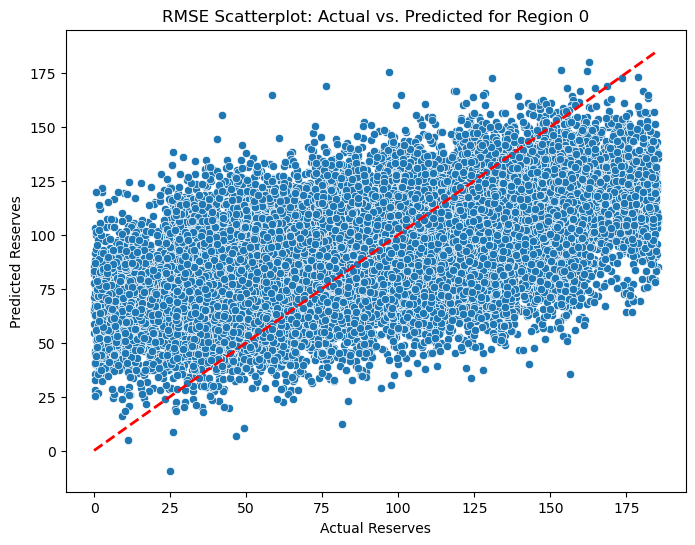

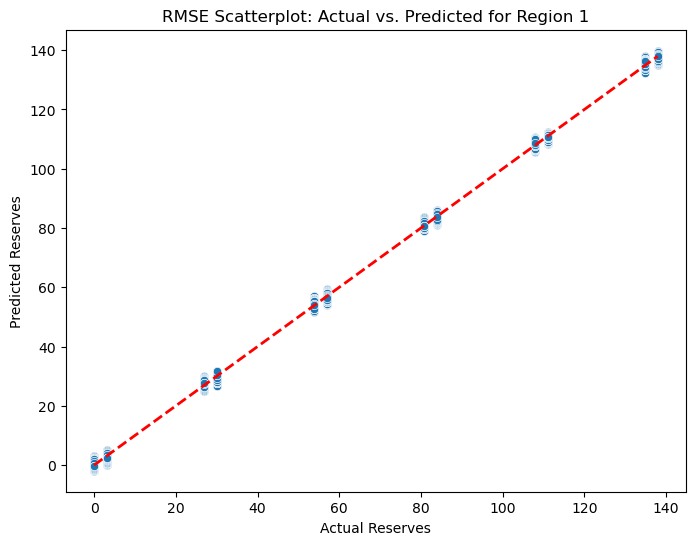

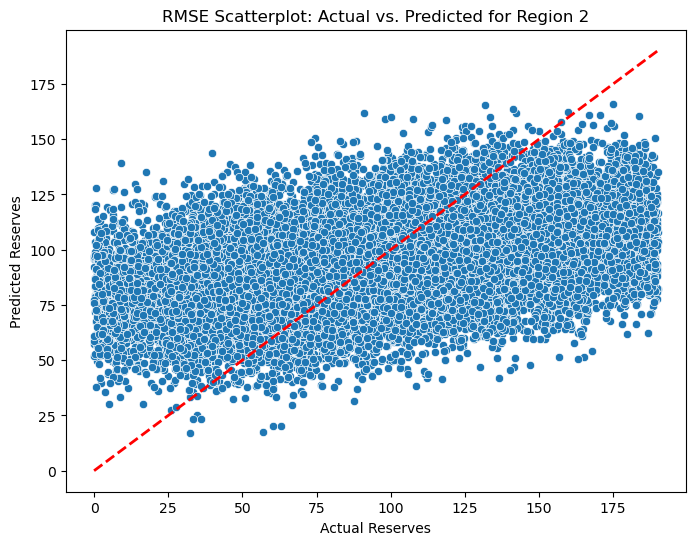

In [36]:
# Define a function to create a scatterplot for each region
def plot_actual_vs_predicted(actual, predicted, region_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual, y=predicted)
    plt.title(f'RMSE Scatterplot: Actual vs. Predicted for {region_name}')
    plt.xlabel('Actual Reserves')
    plt.ylabel('Predicted Reserves')
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--', linewidth=2)  # Line of perfect prediction
    plt.show()
    
    
# Create scatterplot for Region 0
plot_actual_vs_predicted(results_region_0['actual_target'], results_region_0['predicted_reserves'], "Region 0")

# Create scatterplot for Region 1
plot_actual_vs_predicted(results_region_1['actual_target'], results_region_1['predicted_reserves'], "Region 1")

# Create scatterplot for Region 2
plot_actual_vs_predicted(results_region_2['actual_target'], results_region_2['predicted_reserves'], "Region 2")

### Conclusion: Analyzing the Results of the Model Predictions
Examining the model results by visually comparing the actual vs predicted per region. 

**Region 0:**

A disperse scatterplot. This indicates that the model captures the trend but may benefit from fine-tuning for better accuracy in this region.

**Region 1:**

The data points are tightly clusterd on the diagonal of the RMSE scatterplot. It suggests this model is well-fitting for this specific dataset.


**Region 2:**

Similar to Region 0, the scatterplot shows a wider spread of points around the ideal line.

**Key Takeaway:**
The visualizations highlight that while the model performs exceptionally well in Region 1, Regions 0 and 2 show greater variability, suggesting that further refinement of the model or additional region-specific features may enhance predictive accuracy.



# Prepare for Profit Calculation
Creating a foundation for financial analysis.

In [37]:
# Given values
revenue_per_barrel = 4500 # Revenue per one unit of product
development_budget = 100_000_000 # Development budget in USD
num_wells = 200

cost_per_well = development_budget / num_wells

## Calculating the volume of reserves required

In [38]:
# Minimum volume of oil reserves required
min_reserves = (development_budget / revenue_per_barrel) / num_wells #'product' describes values in thousands

print(f"Minimum volume of reserves needed: {min_reserves} thousand barrels")

Minimum volume of reserves needed: 111.11111111111111 thousand barrels


In [39]:
# Breakeven = development

### Comparing average volume of reserves to minimum required

In [40]:
# Calculate the average volume of reserves for each region
avg_reserves_region_0 = data_0['product'].mean() 
avg_reserves_region_1 = data_1['product'].mean() 
avg_reserves_region_2 = data_2['product'].mean()

# Print the average reserves for each region
print(f"Average volume of reserves in Region 0: {avg_reserves_region_0} thousand barrels")
print(f"Average volume of reserves in Region 1: {avg_reserves_region_1} thousand barrels")
print(f"Average volume of reserves in Region 2: {avg_reserves_region_2} thousand barrels")

Average volume of reserves in Region 0: 92.50000000000001 thousand barrels
Average volume of reserves in Region 1: 68.82500000000002 thousand barrels
Average volume of reserves in Region 2: 95.00000000000004 thousand barrels


In [41]:
# Compare the average reserves to the minimum required
regions_comparison = {
    'Region 0': avg_reserves_region_0,
    'Region 1': avg_reserves_region_1,
    'Region 2': avg_reserves_region_2
}

for region, avg_reserves in regions_comparison.items():
    if (avg_reserves) >= min_reserves: # We're looking to develop 200 wells
        print(f"{region} has sufficient reserves for development.")
    else:
        print(f"{region} does not have sufficient reserves for development.")

Region 0 does not have sufficient reserves for development.
Region 1 does not have sufficient reserves for development.
Region 2 does not have sufficient reserves for development.


**Conclusion from comparing the average volumes at random:**

The average volumes in these three regions are less than the required value. If we are to select the wells randomly, we are probably going to lose money. That's why we need machine learning and bootstrapping to estimate profit distributions. 
    

# Calculating Profit

## Picking the wells with the highest values of predictions

From the calculations on the average of all the well data, we weren't able to identify a profitable region for development.

Moving forward, we'll use the top 200 wells for reach region to identify the region and wells, that will maximize profitability in development.

In [42]:
len(results_region_0)

25000

In [43]:
top_wells_region_0_df = results_region_0.sort_values(by='predicted_reserves', ascending=False).head(200)
top_wells_region_1_df = results_region_1.sort_values(by='predicted_reserves', ascending=False).head(200)
top_wells_region_2_df = results_region_2.sort_values(by='predicted_reserves', ascending=False).head(200)

In [44]:
# Calculate total and mean predicted reserves
#total_reserves = top_wells['predicted_reserves'].sum()
#mean_reserves = top_wells['predicted_reserves'].mean()

total_reserves_0 = top_wells_region_0_df['predicted_reserves'].sum()
mean_reserves_0 = top_wells_region_0_df['predicted_reserves'].mean()
actual_reserves_0 = top_wells_region_0_df['actual_target'].mean()

total_reserves_1 = top_wells_region_1_df['predicted_reserves'].sum()
mean_reserves_1 = top_wells_region_1_df['predicted_reserves'].mean()
actual_reserves_1 = top_wells_region_1_df['actual_target'].mean()

total_reserves_2 = top_wells_region_2_df['predicted_reserves'].sum()
mean_reserves_2 = top_wells_region_2_df['predicted_reserves'].mean()
actual_reserves_2 = top_wells_region_2_df['actual_target'].mean()

In [45]:
#Region 0
total_reserves_0, mean_reserves_0, actual_reserves_0

(31102.33083881133, 155.51165419405663, 148.00917825710945)

In [46]:
#Region 1
total_reserves_1, mean_reserves_1, actual_reserves_1

(27746.02678216348, 138.73013391081741, 137.9454077409057)

In [47]:
#Region 2
total_reserves_2, mean_reserves_2, actual_reserves_2

(29603.898658318307, 148.01949329159154, 141.2261107066648)

### Summarizing the Predicted Reserves Using the Top 200 Wells for Each Region


Using our model reserve predictions for the top 200 wells, the wells in each region all have sufficient reserves for development.  

**Region 0:**

- Region 0 has 31102.331 thousand barrels in predicted reserve volume.
- With an predicted average of 155.51 thousand barrels per well.

**Region 1:**

- Region 1 has 27746.027 thousand barrels in predicted reserve volume.
- With an predicted average of 138.73 thousand barrels per well.

**Region 2:**

- Region 2 has 29603.899 thousand barrels in predicted reserve volume.
- With an predicted average of 148.02 thousand barrels per well.



## Determinig the most profitable region

In [48]:
def calculate_profit(well_data):   #calculate profit from dataframe
    development_budget = 100_000_000
    revenue_per_barrel = 4500
    
    well_data = well_data.sort_values('predicted_reserves', ascending=False)
    well_data = well_data.head(200)
    #print(well_data.head())
        
    # Calculate total reserve units for top 200 wells
    well_data_sum = well_data['actual_target'].sum()    
    
    # Calculate profit based on total reserves
    profit = (well_data_sum  * revenue_per_barrel) - development_budget
    
    return well_data_sum, profit

In [49]:
well_results_0 = calculate_profit(results_region_0)
well_results_1 = calculate_profit(results_region_1)
well_results_2 = calculate_profit(results_region_2)

In [50]:
well_results_0

(29601.83565142189, 33208260.43139851)

In [51]:
well_results_1

(27589.081548181137, 24150866.966815114)

In [52]:
well_results_2

(28245.22214133296, 27103499.635998324)

### Choosing a well 

Based on the analysis of the predicted top 200 wells for each region, Region 0 is the best choice for development. 

- Region 0 yields the highest profit with approximately **29601.84 thousand barrels** in reserves and a profit of **$33,208,260.43**.



# Calculating Risks and Profit for Each Region

Using the model dataset, I'm performing a bootstrap analysis and examining the profitability results. 

In [53]:
len(results_region_0)

25000

In [54]:
# Region 0 - bootstrap
bootstrap_samples = 1000
count = 0

data_region_0 = results_region_0

state = np.random.RandomState(12345)

#list to store profits
profit_list_0 = []
loss_count_0 = 0


for i in range(bootstrap_samples):
    # Sample with replacement
    subsample_0 = data_region_0.sample(n=500, replace=True, random_state=state)
    
    #Debugging the profit calculation
    subsample_sorted = subsample_0.sort_values(by='predicted_reserves', ascending=False).head(200)
    
    # Calculate profit
    _, profit = calculate_profit(subsample_0)


    # Add profit to list
    profit_list_0.append(profit)
    
    #Loss counter
    if profit < 0:
        loss_count_0 += 1
        
    
# Convert profits_0 to a numeric Series to avoid dtype issues
profits_0 = pd.Series(profit_list_0, dtype='float64')
#print(min(profits_0), max(profits_0))

# Average profit
avg_profit_0 = profits_0.mean()
print(f"Average profit for Region 0: ${avg_profit_0}")

    
    
# Calculate the 95% confidence interval for the 99% quantiles
ci_lower_0 = profits_0.quantile(0.025)  # Lower percentile
ci_upper_0 = profits_0.quantile(0.975)  # Upper percentile

print(f"95% confidence interval: [{ci_lower_0}, {ci_upper_0}]")

loss_probability_0 = (loss_count_0 / bootstrap_samples) * 100
print(f"Loss probability: {loss_probability_0}%")


Average profit for Region 0: $3961649.8480237117
95% confidence interval: [-1112155.4589049604, 9097669.41553423]
Loss probability: 6.9%


count    25000.000000
mean        92.078597
std         44.286913
min          0.004022
25%         56.059494
50%         90.897664
75%        128.160698
max        185.315412
Name: actual_target, dtype: float64
Axes(0.125,0.11;0.775x0.77)


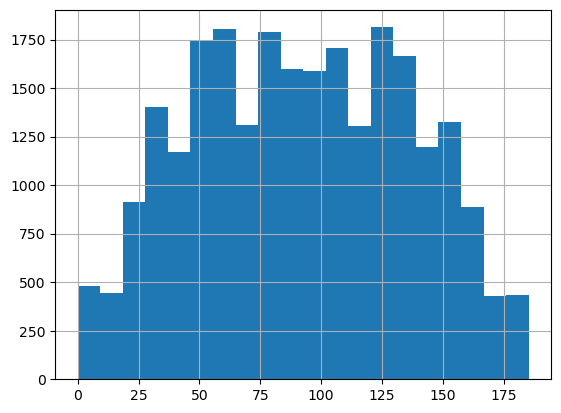

In [55]:
# Debugging the loss for region 0... 
print(data_region_0['actual_target'].describe())
print(data_region_0['actual_target'].hist(bins=20))

In [56]:
len(results_region_1)

25000

In [57]:
# Region 1 - bootstrap
bootstrap_samples = 1000
count = 0

data_region_1 = results_region_1

state = np.random.RandomState(12345)

#list to store profits
profit_list_1 = []
loss_count_1 = 0


for i in range(bootstrap_samples):
    # Sample with replacement
    subsample_1 = data_region_1.sample(n=500, replace=True, random_state=state)
    
    # Calculate profit
    _, profit_1 = calculate_profit(subsample_1)

    # Add to list
    profit_list_1.append(profit_1)
    
    #Loss counter
    if profit_1 < 0:
        loss_count_1 += 1
    
    
# Convert profits_1 to a numeric Series to avoid dtype issues
profits_1 = pd.Series(profit_list_1, dtype='float64')
#print(min(profits_1), max(profits_1))

# Average profit
avg_profit_1 = profits_1.mean()
print(f"Average profit for Region 1: ${avg_profit_1}")
    
# Calculate the 95% confidence interval for the 99% quantiles
ci_lower_1 = profits_1.quantile(0.025)  # Lower percentile
ci_upper_1 = profits_1.quantile(0.975)  # Upper percentile

print(f"95% confidence interval: [{ci_lower_1}, {ci_upper_1}]")

loss_probability_1 = (loss_count_1 / bootstrap_samples) * 100
print(f"Loss probability: {loss_probability_1}%")


Average profit for Region 1: $4560451.057866608
95% confidence interval: [338205.0939898458, 8522894.538660347]
Loss probability: 1.5%


count    25000.000000
mean        68.723136
std         46.022165
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: actual_target, dtype: float64
Axes(0.125,0.11;0.775x0.77)


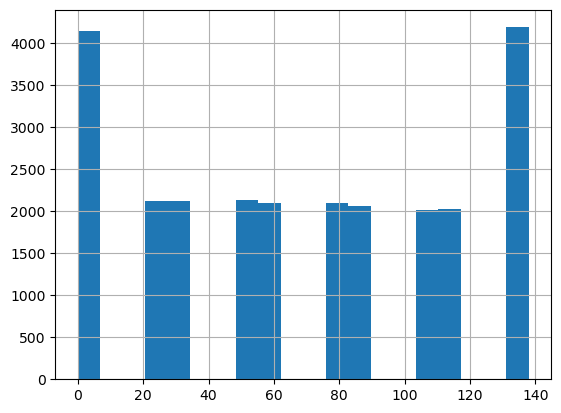

In [58]:
# Debugging the loss for region 1... 
print(data_region_1['actual_target'].describe())
print(data_region_1['actual_target'].hist(bins=20))

In [59]:
len(results_region_2)

25000

In [60]:
# Region 2 - bootstrap
bootstrap_samples = 1000
count = 0

data_region_2 = results_region_2

state = np.random.RandomState(12345)

#list to store profits
profit_list_2 = []
loss_count_2 = 0


for i in range(bootstrap_samples):
    # Sample with replacement
    subsample_2 = data_region_2.sample(n=500, replace=True, random_state=state)
    
    # Calculate profit
    _, profit_2 = calculate_profit(subsample_2)

    profit_list_2.append(profit_2)
    
    #Loss counter
    if profit_2 < 0:
        loss_count_2 += 1
    
    
# Convert profits_1 to a numeric Series to avoid dtype issues
profits_2 = pd.Series(profit_list_2, dtype='float64')
#print(min(profits_2), max(profits_2))

# Average profit
avg_profit_2 = profits_2.mean()
print(f"Average profit for Region 2: ${avg_profit_2}")
    
# Calculate the 95% confidence interval for the 99% quantiles
ci_lower_2 = profits_2.quantile(0.025)  # Lower percentile
ci_upper_2 = profits_2.quantile(0.975)  # Upper percentile

print(f"95% confidence interval: [{ci_lower_2}, {ci_upper_2}]")

loss_probability_2 = (loss_count_2 / bootstrap_samples) * 100
print(f"Loss probability: {loss_probability_2}%")


Average profit for Region 2: $4044038.665683568
95% confidence interval: [-1633504.1339559986, 9503595.749237997]
Loss probability: 7.6%


count    25000.000000
mean        94.884233
std         44.902982
min          0.000000
25%         59.217876
50%         94.979468
75%        130.568416
max        190.010982
Name: actual_target, dtype: float64
Axes(0.125,0.11;0.775x0.77)


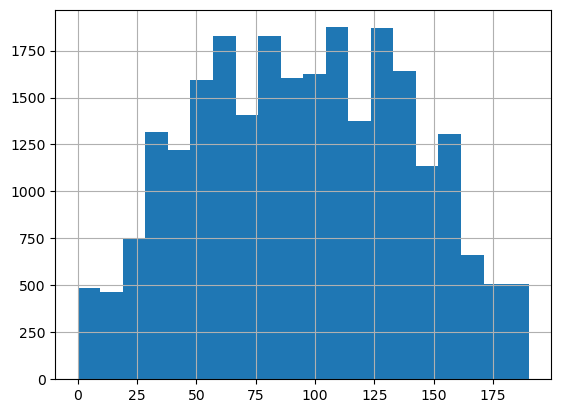

In [61]:
# Debugging the loss for region 2... 
print(data_region_2['actual_target'].describe())
print(data_region_2['actual_target'].hist(bins=20))

### Summary of Risk & Profit for Each Region After Bootstrapping


**Region 0:**
- **Average Profit:** $3,961,649.85
- Using a 95% Confidence Interval, the profit distribution will be between `-$1,112,155.46 and $9,097,669.42`
- **Loss Probability:** 6.9% 


**Region 1:**
- **Average Profit:** $4,560,451.06
- Using a 95% Confidence Interval, the profit distribution will be between `$338,205.09 and $8,522,894.54`.
- **Loss Probability:** 1.5% 


**Region 2:**
- **Average Profit:** $4,044,038.67
- Using a 95% Confidence Interval, the profit distribution will be between `-$1633504.13 and $9,503,595.75`.
- **Loss Probability:** 7.6%

## Conclusion: Oil Well Location Analysis

After conducting a thorough analysis of the three regions under consideration for oil well development, Region 0 emerges as the most promising choice for investment. Below is a summary of the findings and insights from the analysis:

1. Initial Predictions and Data Analysis:

- A machine learning model was used to predict oil reserves for each well in all three regions. The predictions were evaluated to ensure their reliability, with particular attention paid to metrics such as mean squared error and model performance during training.

The predicted oil reserves varied across regions, with **Region 2** demonstrating a higher average predicted reserve per well compared to the other two regions and Region 0 showing the highest total volume.

- Checking the original data, the average reserves of each well in the data set proved to not meet the minimum requirements for development.

2. Top 200 Wells Selection:
For each region, the top 200 wells with the highest predicted reserves were selected for further analysis. From these predictions, Region 0 appeared to be the top region with a predicted sum of 31102.330839 thousand barrels and an average of 155.511654 thousand barrels.


3. Profitability Assessment:
A bootstrap analysis was performed to estimate the average profit, 95% confidence interval, and the probability of loss for each region.

- **Region 1** showed the highest average profit of **$4,560,451.06** with an estimated range for average profit begin between `$338,205.09 and $8,522,894.54`.


4. Risk Analysis:

- The analysis of loss probability indicated that **Region 1** also had the lowest probability of loss at 1.5%.


## Next Steps

It's possible that using another model and/or refining the existing model might provide more accurate insights. This model appears to have tendencies towards overfitting, but that could be a result of synthetic features. 